## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
from keras.regularizers import l1, l2, l1_l2
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], pattern = l1, regular_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=pattern(regular_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=pattern(regular_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.95
EXP = [1e-2, 1e-4, 1e-8]
PATTERN = {'l1': l1, 'l1_l2': l1_l2}

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for key, pattern in PATTERN.items():
    for regulizer_ratio in EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment %s with Regulizer = %.12f" % (key, regulizer_ratio))
        model = build_mlp(input_shape=x_train.shape[1:], pattern=pattern, regular_ratio=regulizer_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-%s-%s" % (key, str(regulizer_ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment l1 with Regulizer = 0.010000000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [============

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 103us/step - loss: 2.0175 - acc: 0.2771 - val_loss: 1.8546 - val_acc: 0.3431
Epoch 2/20
50000/50000 [==============================] - 5s 94us/step - loss: 1.7983 - acc: 0.3649 - val_loss: 1.7556 - val_acc: 0.3761
Epoch 3/20
50000/50000 [==============================] - 5s 94us/step - loss: 1.7150 - acc: 0.3951 - val_loss: 1.6843 - val_acc: 0.4048
Epoch 4/20
50000/50000 [==============================] - 5s 94us/step - loss: 1.6583 - acc: 0.4154 - val_loss: 1.6439 - val_acc: 0.4192
Epoch 5/20
50000/50000 [==============================] - 5s 93us/step - loss: 1.6131 - acc: 0.4318 - val_loss: 1.5917 - val_acc: 0.4416
Epoch 6/20
50000/50000 [==============================] - 5s 93us/step - loss: 1.5742 - acc: 0.4464 - val_loss: 1.5721 - val_acc: 0.4386
Epoch 7/20
50000/50000 [==============================] - 5s 94us/step - loss: 1.5421 - acc: 0.4575 - val_loss: 1.5525 - val_ac

Epoch 4/20
50000/50000 [==============================] - 5s 102us/step - loss: 12.1179 - acc: 0.3916 - val_loss: 11.2819 - val_acc: 0.3966
Epoch 5/20
50000/50000 [==============================] - 5s 102us/step - loss: 10.5458 - acc: 0.4020 - val_loss: 9.8451 - val_acc: 0.3945
Epoch 6/20
50000/50000 [==============================] - 5s 101us/step - loss: 9.2095 - acc: 0.4087 - val_loss: 8.6086 - val_acc: 0.4099
Epoch 7/20
50000/50000 [==============================] - 5s 102us/step - loss: 8.0702 - acc: 0.4147 - val_loss: 7.5534 - val_acc: 0.4150
Epoch 8/20
50000/50000 [==============================] - 5s 102us/step - loss: 7.0997 - acc: 0.4187 - val_loss: 6.6594 - val_acc: 0.4225
Epoch 9/20
50000/50000 [==============================] - 5s 102us/step - loss: 6.2735 - acc: 0.4221 - val_loss: 5.8976 - val_acc: 0.4276
Epoch 10/20
50000/50000 [==============================] - 5s 102us/step - loss: 5.5698 - acc: 0.4251 - val_loss: 5.2512 - val_acc: 0.4244
Epoch 11/20
50000/50000 [=====

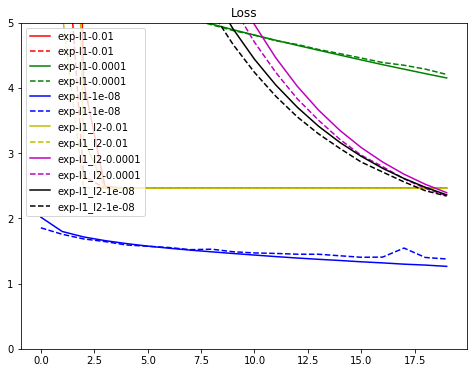

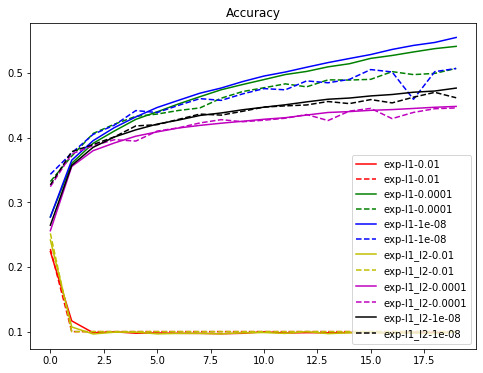

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "w"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()